<a href="https://colab.research.google.com/github/obaidsafi51/InternIntelligence_Predictive_Model/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install palmerpenguins factor_analyzer statsmodels --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import f_oneway  # ANOVA
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA


In [ ]:
# For regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from palmerpenguins import load_penguins

penguins = load_penguins()
print("Dataset shape:", penguins.shape)
penguins.head()

Dataset shape: (344, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# Check for missing values
print("\nMissing values per column:")
penguins.dropna(inplace=True)
print(penguins.isnull().sum())



Missing values per column:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [ ]:
# Basic summary statistics
print("\nSummary Statistics:")
print(penguins[["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm", "body_mass_g"]].describe())


Summary Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


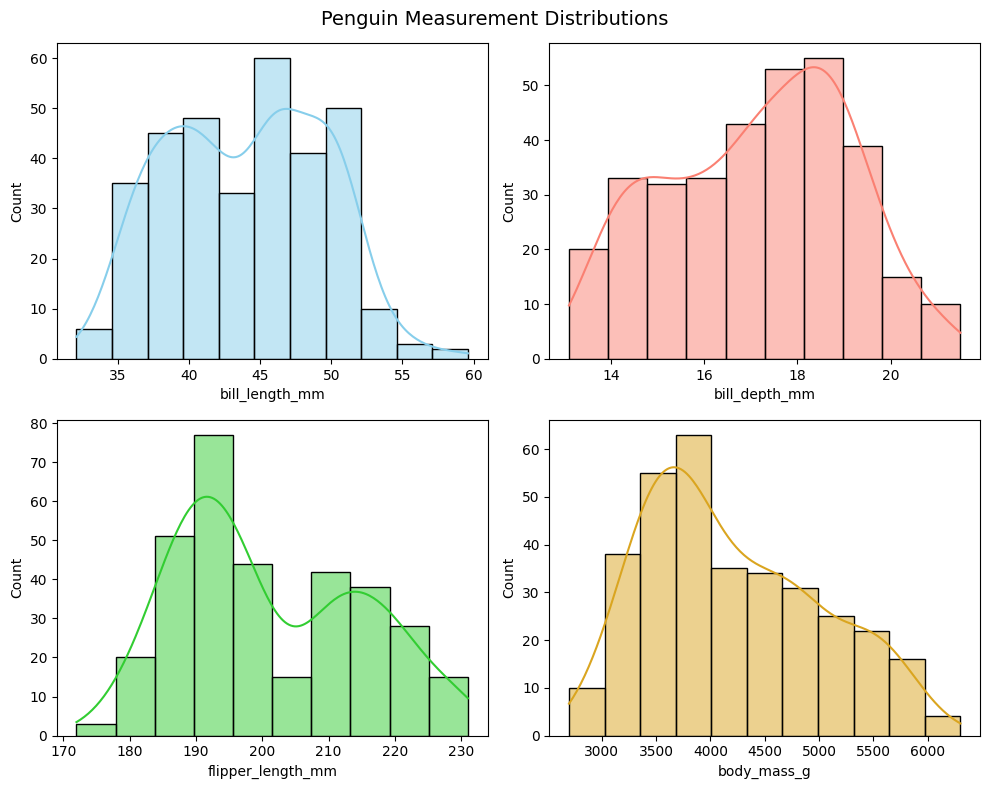

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
sns.histplot(data=penguins, x="bill_length_mm", kde=True, ax=axes[0,0], color="skyblue")
sns.histplot(data=penguins, x="bill_depth_mm", kde=True, ax=axes[0,1], color="salmon")
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=axes[1,0], color="limegreen")
sns.histplot(data=penguins, x="body_mass_g", kde=True, ax=axes[1,1], color="goldenrod")
plt.suptitle("Penguin Measurement Distributions", fontsize=14)
plt.tight_layout()
plt.show()

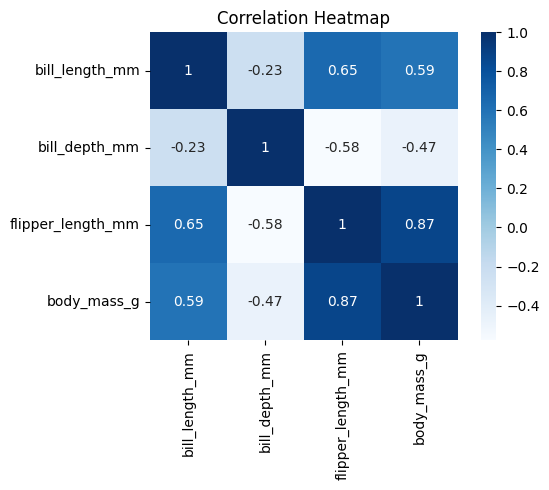

In [ ]:
# Correlation heatmap
corr_matrix = penguins[["bill_length_mm", "bill_depth_mm",
                        "flipper_length_mm", "body_mass_g"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
species_groups = penguins.groupby("species")["body_mass_g"].apply(list)
f_stat, p_value = f_oneway(*species_groups)
print("\nANOVA: Body Mass by Species")
print(f"F-statistic = {f_stat:.4f}, p-value = {p_value:.4e}")

# Interpretation:
# If p-value < 0.05, we reject H0 and conclude there is a significant difference
# in mean body mass among species.


ANOVA: Body Mass by Species
F-statistic = 341.8949, p-value = 3.7445e-81


In [ ]:
numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguins[numeric_cols].values

pca = PCA(n_components=2)  # let's reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

print("\nPCA Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# FACTOR ANALYSIS (OR PCA) ON NUMERIC FEATURES
# We'll demonstrate PCA here (similar concept to factor analysis for exploration).
# Using numeric columns: bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g


PCA Explained Variance Ratios: [9.99893229e-01 7.82232504e-05]
Total Variance Explained: 0.9999714527103739


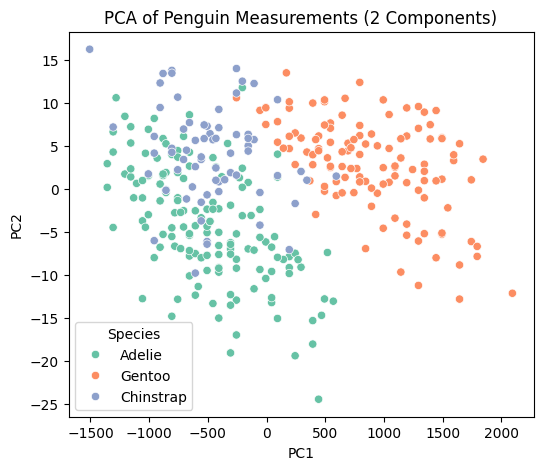

In [ ]:
# Scatter plot of first 2 PCA components
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=penguins["species"], palette="Set2")
plt.title("PCA of Penguin Measurements (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Species")
plt.show()

In [ ]:
# REGRESSION ANALYSIS: PREDICT BODY MASS
# We'll use a simple multiple regression with numeric features to predict body_mass_g.

# Create a formula for statsmodels
# For demonstration, let's use species as a categorical predictor too.
# We'll treat species as a factor, which statsmodels handles automatically.
penguins["species"] = penguins["species"].astype("category")

model_formula = """
body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(species)
"""

reg_model = ols(model_formula, data=penguins).fit()
print("\nRegression Model Summary:")
print(reg_model.summary())



Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     369.1
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          4.22e-132
Time:                        18:04:37   Log-Likelihood:                -2384.8
No. Observations:                 333   AIC:                             4782.
Df Residuals:                     327   BIC:                             4805.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
# We'll print out a final summary of the findings:

print("\n----------------- FINAL SUMMARY -----------------")
print("1. Distribution & Correlations:")
print("   - Bill length & flipper length correlate strongly with body mass.")
print("   - Bill depth is moderately correlated.")
print("2. ANOVA Result:")
if p_value < 0.05:
    print(f"   - p-value = {p_value:.4e} < 0.05, significant difference in body mass among species.")
else:
    print(f"   - p-value = {p_value:.4e}, no significant difference in body mass among species.")
print("3. PCA/Factor Analysis:")
print("   - The first 2 principal components explain about "
      f"{sum(pca.explained_variance_ratio_)*100:.2f}% of the variance.")
print("   - PC1 seems to be driven largely by overall size (bill & flipper).")
print("4. Regression Analysis:")
print("   - R-squared indicates how much variation in body mass is explained.")
print("   - Species, flipper length, and bill dimensions significantly affect body mass.")
print("-------------------------------------------------")


----------------- FINAL SUMMARY -----------------
1. Distribution & Correlations:
   - Bill length & flipper length correlate strongly with body mass.
   - Bill depth is moderately correlated.
2. ANOVA Result:
   - p-value = 3.7445e-81 < 0.05, significant difference in body mass among species.
3. PCA/Factor Analysis:
   - The first 2 principal components explain about 100.00% of the variance.
   - PC1 seems to be driven largely by overall size (bill & flipper).
4. Regression Analysis:
   - R-squared indicates how much variation in body mass is explained.
   - Species, flipper length, and bill dimensions significantly affect body mass.
-------------------------------------------------


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppose penguins is your cleaned penguins DataFrame (no NaNs)
# We'll isolate numeric columns used in regression:
numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
X = penguins[numeric_cols].assign(const=1)  # add constant for VIF calculation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,bill_length_mm,1.850958
1,bill_depth_mm,1.593411
2,flipper_length_mm,2.633327
3,const,691.005294


from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vif_data.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vif_data['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vif_data, x='VIF', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_morph = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].dropna()
X_pca = pca.fit_transform(X_morph)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Sum of explained variance:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.91895303 0.07070604]
Sum of explained variance: 0.9896590684060708


In [ ]:
from sklearn.linear_model import RidgeCV

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
y = penguins["body_mass_g"]

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5).fit(X, y)
print("Best alpha:", ridge_model.alpha_)
print("Coefficients:", ridge_model.coef_)


Best alpha: 10.0
Coefficients: [ 3.33579083 17.55705417 50.72073872]


In [ ]:
import statsmodels.formula.api as smf

# Interaction between species and bill_length_mm
formula_interact = """
body_mass_g ~ bill_length_mm * species + bill_depth_mm + flipper_length_mm
"""
model_interact = smf.ols(formula_interact, data=penguins).fit()
print(model_interact.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     272.6
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          6.88e-132
Time:                        18:21:37   Log-Likelihood:                -2379.3
No. Observations:                 333   AIC:                             4775.
Df Residuals:                     325   BIC:                             4805.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

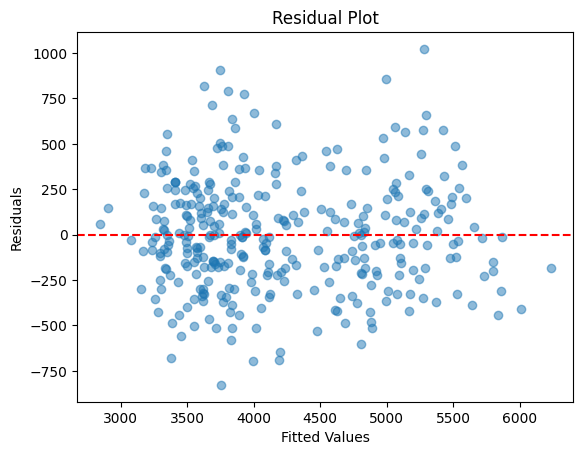

In [ ]:
import matplotlib.pyplot as plt

residuals = model_interact.resid
fitted = model_interact.fittedvalues

plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
penguins["log_body_mass"] = np.log(penguins["body_mass_g"])

# Then update your formula to use log_body_mass
model_log = smf.ols("log_body_mass ~ bill_length_mm + bill_depth_mm + flipper_length_mm + species", data=penguins).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:          log_body_mass   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     330.6
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          1.63e-125
Time:                        18:23:44   Log-Likelihood:                 383.56
No. Observations:                 333   AIC:                            -755.1
Df Residuals:                     327   BIC:                            -732.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3273 

In [ ]:
import statsmodels.api as sm

# Prepare design matrices
y = penguins["body_mass_g"]
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
X = sm.add_constant(X)

rlm_model = sm.robust.robust_linear_model.RLM(y, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:            body_mass_g   No. Observations:                  333
Model:                            RLM   Df Residuals:                      329
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 15 Feb 2025                                         
Time:                        18:24:28                                         
No. Iterations:                     9                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6532.7826    584.95

In [ ]:
import statsmodels.formula.api as smf

# Example if you have 'island' as a grouping variable
mixed_model = smf.mixedlm("body_mass_g ~ bill_length_mm + bill_depth_mm",
                          data=penguins,
                          groups=penguins["island"])
mixed_results = mixed_model.fit()
print(mixed_results.summary())


             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   body_mass_g
No. Observations:    333       Method:               REML       
No. Groups:          3         Scale:                245862.9512
Min. group size:     47        Log-Likelihood:       -2531.3200 
Max. group size:     163       Converged:            Yes        
Mean group size:     111.0                                      
----------------------------------------------------------------
                 Coef.    Std.Err.   z    P>|z|  [0.025  0.975] 
----------------------------------------------------------------
Intercept        1285.154  480.651  2.674 0.008 343.095 2227.213
bill_length_mm     76.030    5.402 14.074 0.000  65.442   86.618
bill_depth_mm     -28.042   17.882 -1.568 0.117 -63.090    7.005
Group Var      183193.224  376.156                              



In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])

loadings = fa.loadings_
print("Factor Loadings:\n", loadings)


Factor Loadings:
 [[ 0.69998633  0.09822255]
 [-0.2171909  -0.7798111 ]
 [ 0.86276076  0.50064396]
 [ 0.78794899  0.38583762]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
y = penguins["body_mass_g"]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring="neg_mean_squared_error")

print("Random Forest CV MSE:", -scores.mean())


Random Forest CV MSE: 177438.53660391225
